In [1]:

#Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [266]:
df = pd.read_csv('Cleaned Data.csv')

ML = ['Machine Learning', 'Machine Learning ']

for title in ML:
    df['title scraped for'].replace(
        title, 'Machine Learning Engineer', inplace=True)

df['title scraped for'].value_counts()


Machine Learning Engineer    2136
Data Scientist               2124
Web Developer                1962
Business Analyst             1265
Data Analyst                 1213
Name: title scraped for, dtype: int64

In [191]:
df.isna().sum()


company               126
location                0
title scraped for       0
Country                 0
State                   0
age                  8684
Position             6230
upper_salary         6303
lower_salary         5867
payment_frequency    5892
year_of_exp          2777
contract_type        7433
eligibility          3350
title_cleaned           1
skills_list             0
dtype: int64

In [267]:
# Dropping records with missing values for lower salary range

df.dropna(subset=["lower_salary"], inplace=True)


In [243]:
df.shape

(2833, 15)

In [268]:
# Columns to drop
columns_to_drop = ["company", "location", "State", "age"]

# Drop unnecessary columns
df.drop(columns_to_drop, axis="columns", inplace=True)


In [269]:
# EDA on years of exprience column
df['year_of_exp'].describe()

count    1932.000000
mean        4.746377
std        16.734094
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       329.000000
Name: year_of_exp, dtype: float64

(array([1.902e+03, 2.000e+01, 1.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00]),
 array([  0. ,  32.9,  65.8,  98.7, 131.6, 164.5, 197.4, 230.3, 263.2,
        296.1, 329. ]),
 <a list of 10 Patch objects>)

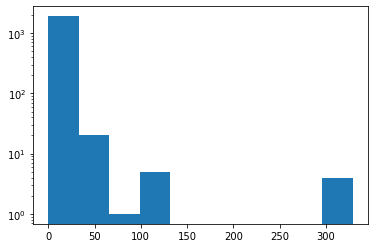

In [178]:
plt.hist(df['year_of_exp'].dropna(), log=True)

In [270]:
#replace all values of by above 14years of experience with 10 years
for i in df['year_of_exp']:
    if i >= 15:
        df['year_of_exp'].replace(i,10, inplace= True)
    else:
        pass


In [285]:
#fill all the missing with the average years of experience
df['year_of_exp'].fillna(df.year_of_exp.mean(), inplace= True)


In [275]:
# Defining a function the determines the Position based on the Years of Experience
def position_based_on_yoe(df_YOE):
    if df_YOE < 4:
        return "Entry Level"
    elif df_YOE > 4 and df_YOE < 7:
        return "Mid-Level"
    else:
        return "Senior Level"


In [276]:
# Filling the missing values for Position with "Position based on Years of experience"
df["Position_based_on_YOE"] = df.year_of_exp.apply(position_based_on_yoe)
df.reset_index(drop=True, inplace=True)

for i in range(df.shape[0]):
    if df.iloc[i, 2] is np.nan:
        df.iloc[i, 2] = df.iloc[i, -1]


df.drop('Position_based_on_YOE', axis="columns", inplace=True)


In [277]:
# Replace "hs" with "high school diploma" in eligibility
df.eligibility.replace("hs", 'high school diploma', inplace=True)


# Fill missing values for eligibility with "high school diploma"
df.eligibility.fillna('undergraduate', inplace=True)


# Fill missing values for contract_type with the mode of contract_type
df.contract_type.fillna(df.contract_type.mode()[0], inplace=True)

# Fill missiong values for payment_frequency with Monthly
df['payment_frequency'] = df['payment_frequency'].fillna('Monthly')


In [278]:
# Creating an exchange rate for each country currency with respect to UD dollars
Exchange_rate = {"Nigeria": 423.42,
                 "India": 79.97,
                 "USA": 1,
                 "UK": 1.17}
df["Exchange_rate"] = df.Country.map(Exchange_rate)

# Converting the salary currency for each Job to US dollars
df.upper_salary = df.upper_salary / df.Exchange_rate
df.lower_salary = df.lower_salary / df.Exchange_rate

df.drop('Exchange_rate', axis="columns", inplace=True)


In [218]:
df.shape



(2833, 15)

In [279]:
#Change of all position of senior job role to senior entry

df[df['title_cleaned'].str.lower().str.contains('senior')]['Position'].replace(
    'Mid-Level', 'Senior Level', inplace=True)

df[df['title_cleaned'].str.lower().str.contains('senior')]['Position'].replace(
    'Entry Level', 'Senior Level', inplace= True)

df[df['title_cleaned'].str.lower().str.contains('senior')]['Position'].fillna(
    'Senior Level', inplace=True)

#Change of all position of junior job role to entry entry
df[df['title_cleaned'].str.lower().str.contains('junior')].replace(
    'Mid-Level', 'Entry Level', inplace=True)

df[df['title_cleaned'].str.lower().str.contains('junior')].replace(
    'Senior Level', 'Entry Level', inplace=True)

df[df['title_cleaned'].str.lower().str.contains('junior')].fillna('Entry Level', inplace=True)


c:\Users\POPOOLA KAYODE\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
c:\Users\POPOOLA KAYODE\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
c:\Users\POPOOLA KAYODE\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [286]:
df.isna().sum()


title scraped for      0
Country                0
Position               0
upper_salary         436
lower_salary           0
payment_frequency      0
year_of_exp            0
contract_type          0
eligibility            0
dtype: int64

In [280]:
Frequency_to_yearly = {"Hourly": 40 * 52,
                       "Weekly": 52,
                       "Monthly": 12,
                       "Yearly": 1}
df["Frequency_to_yearly"] = df.payment_frequency.map(Frequency_to_yearly)




In [281]:
# Standardizing the payment frequency to Yearly
df.upper_salary = df.upper_salary * df["Frequency_to_yearly"]
df.lower_salary = df.lower_salary * df["Frequency_to_yearly"]
df.drop('Frequency_to_yearly', axis="columns", inplace=True)


df.drop(["skills_list",'title_cleaned'], axis="columns", inplace = True)

In [282]:
categorical_columns = ["title scraped for", 'Country',
                       'Position', 'contract_type', 'eligibility', 'payment_frequency']
df[categorical_columns] = df[categorical_columns].astype('category')
df6 = df.copy()
for x in categorical_columns:
    df[x] = df[x].cat.codes


In [283]:
feature_dict = {}
for col in df.drop(["lower_salary", "upper_salary"], axis="columns").columns:
  if col in categorical_columns:
    feature_dict[col] = dict(enumerate(df6[col].cat.categories))
  else:
    feature_dict[col] = None


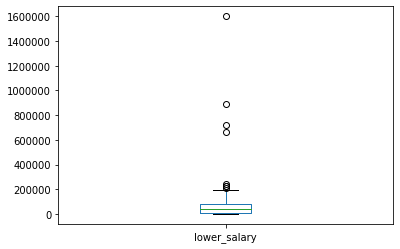

In [257]:
df.lower_salary.plot(kind = 'box')

#there are outlier present in the lower salary

In [258]:
df.corr()

,title scraped for,Country,Position,upper_salary,lower_salary,payment_frequency,year_of_exp,contract_type,eligibility
title scraped for,1.000000,-0.180571,-0.059181,-0.138424,-0.099318,-0.069452,-0.098420,0.064952,0.038723
Country,-0.180571,1.000000,0.210764,0.761643,0.626342,0.317561,0.292318,-0.090250,-0.080522
Position,-0.059181,0.210764,1.000000,0.275572,0.209818,0.182235,0.526490,-0.021694,-0.021961
upper_salary,-0.138424,0.761643,0.275572,1.000000,0.808623,0.221448,0.300975,-0.094842,-0.067636
lower_salary,-0.099318,0.626342,0.209818,0.808623,1.000000,0.142872,0.225813,-0.081178,-0.051901
payment_frequency,-0.069452,0.317561,0.182235,0.221448,0.142872,1.000000,0.206582,0.289276,-0.064514
year_of_exp,-0.098420,0.292318,0.526490,0.300975,0.225813,0.206582,1.000000,0.015560,-0.015245
contract_type,0.064952,-0.090250,-0.021694,-0.094842,-0.081178,0.289276,0.015560,1.000000,0.021224
eligibility,0.038723,-0.080522,-0.021961,-0.067636,-0.051901,-0.064514,-0.015245,0.021224,1.000000


In [259]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [260]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from catboost             import CatBoostRegressor

imputer = IterativeImputer(
    verbose=2,
    max_iter=20,
    imputation_order='descending')


df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


[IterativeImputer] Completing matrix with shape (2833, 9)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.05
[IterativeImputer] Change: 549124.9318755025, scaled tolerance: 1600.0 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.11
[IterativeImputer] Change: 0.0, scaled tolerance: 1600.0 
[IterativeImputer] Early stopping criterion reached.


In [261]:
features_dict = {}
i = 0
for feature in list(df2.drop(["lower_salary", "upper_salary"], axis="columns").columns):
    features_dict[i] = feature
    i += 1

print(features_dict)


{0: 'title scraped for', 1: 'Country', 2: 'Position', 3: 'payment_frequency', 4: 'year_of_exp', 5: 'contract_type', 6: 'eligibility'}


In [262]:
# Extracting the features and target variable
y = df2[["lower_salary", "upper_salary"]].values
X = df2.drop(["lower_salary", "upper_salary"], axis="columns")


In [263]:
# Normalizing the data
X = StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)


Train set: (2266, 7) (2266, 2)
Test set: (567, 7) (567, 2)


In [264]:
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [265]:
from sklearn.metrics import r2_score, mean_squared_error
yhat = Lr.predict(X_test)
r2_score(y_test, yhat)


0.6780517943625439